In [38]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [39]:
df = pd.read_csv('WELFake_Dataset.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [41]:
df.describe()

,Unnamed: 0,label
count,72134.000000,72134.000000
mean,36066.500000,0.514404
std,20823.436496,0.499796
min,0.000000,0.000000
25%,18033.250000,0.000000
50%,36066.500000,1.000000
75%,54099.750000,1.000000
max,72133.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
Unnamed: 0    72134 non-null int64
title         71576 non-null object
text          72095 non-null object
label         72134 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [43]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


real    0.514404
fake    0.485596
Name: label, dtype: float64

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

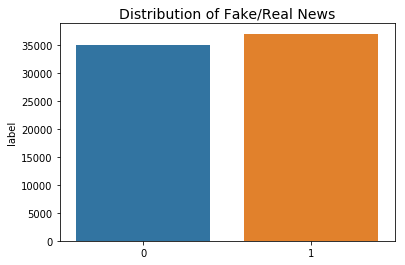

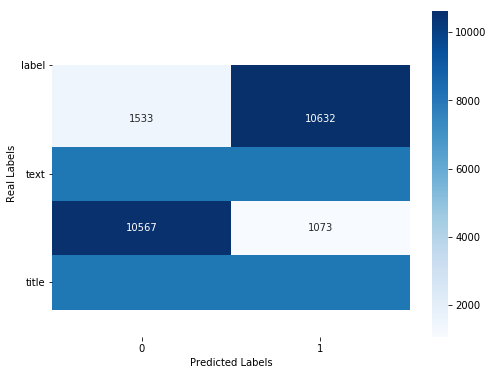

In [46]:
df.isnull().sum().plot(kind="barh")
plt.show()

In [47]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [51]:
df = df.fillna('')

In [50]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [52]:
df.nunique()

title    62348
text     62719
label        2
dtype: int64

In [53]:
df["title_text"] = df["title"] + df["text"]
df["body_len"] = df["title_text"].apply(lambda x: len(x) - x.count(" "))
df.head()

,title,text,label,title_text,body_len
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,4222
1,,Did they post their votes for Hillary already?,1,Did they post their votes for Hillary already?,39
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,299
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"Bobby Jindal, raised Hindu, uses story of Chri...",6811
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,SATAN 2: Russia unvelis an image of its terrif...,1668


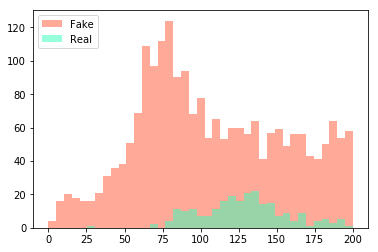

In [54]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df["label"]== 1]["body_len"], bins, alpha=0.5, label="Fake", color="#FF5733")
plt.hist(df[df["label"]== 0]["body_len"], bins, alpha=0.5, label="Real", color="#33FFB8")
plt.legend(loc="upper left")
plt.show()

In [55]:
class_names = ['fake', 'real'] 
label_count = df.label.value_counts()
sns.barplot(x=label_count.index, y=label_count)
plt.title('Distribution of Fake/Real News',fontsize =14)

Text(0.5,1,'Distribution of Fake/Real News')

In [56]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [58]:
titles = ' '.join(title for title in df['title'])
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(titles)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [59]:
fake_news = X_train[y_train == 0]
real_news = X_train[y_train == 1]
fake_texts = ' '.join(text for text in fake_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(fake_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [60]:
real_texts = ' '.join(text for text in real_news)
wordcloud = WordCloud(
    background_color='white', 
    max_words=300,
    width=800, 
    height=400,
).generate(real_texts)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show

NameError: name 'WordCloud' is not defined

In [61]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

KeyboardInterrupt: 

In [63]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [64]:
pred = nb_classifier.predict(count_test)

In [65]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89     11640
          1       0.91      0.87      0.89     12165

avg / total       0.89      0.89      0.89     23805



In [66]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

Text(51,0.5,'Real Labels')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=300)
model.fit(count_train, y_train)


In [ ]:
pred2 = model.predict(count_test)

In [ ]:
print(classification_report(y_test, pred2))

In [ ]:
lt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test,pred2), annot=True, 
            fmt='', cmap='Blues')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')